# งานเพื่อวัดผลการเรียนรู้ของผู้เข้าอบรม (60 คะแนน)
Cat and Dog

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [13]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลของสุนัข และแมวตามคุณลักษณะ (Features) ประกอบด้วย
# หน้ากลม (face), หูตั้ง (ear), สีน้ำตาล (brown), แลบลิ้น (tongue), หนวดยาว (whisker)
data = pd.DataFrame({
    'face':[0, 0, 0, 1, 1, 0],                # หน้ากลม
    'ear':[1, 0, 0, 1, 1, 1],                 # หูตั้ง
    'brown':[1, 1, 1, 0, 1, 0],               # สีน้ำตาล
    'tongue':[1, 1, 0, 0, 0, 0],              # แลบลิ้น
    'whisker':[1, 0, 0, 1, 1, 1],             # หนวดยาว
    'target':['dog', 'dog', 'dog', 'cat', 'cat', 'cat'] # ค่าเป้าหมาย (target) หรือ คลาส (class) หรือ ฉลาก (label)
})

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,dog
1,0,0,1,1,0,dog
2,0,0,1,0,0,dog
3,1,1,0,0,1,cat
4,1,1,1,0,1,cat
5,0,1,0,0,1,cat


## แปลงรหัส (Encoding) ค่าเป้าหมาย (target) จากตัวอักษร 'cat' และ 'dog' ให้กลายเป็นตัวเลขแบบ Label (5 คะแนน)

In [2]:
# Label Encoding ค่าเป้าหมาย (target) แล้วเก็บไว้ใน คอลัมน์ data['target']

In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_data = label_encoder.fit_transform(data['target'])

label_data

array([1, 1, 1, 0, 0, 0])

In [11]:
data['target'] = label_data
data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,1
1,0,0,1,1,0,1
2,0,0,1,0,0,1
3,1,1,0,0,1,0
4,1,1,1,0,1,0
5,0,1,0,0,1,0


## แปลงข้อมูลคุณลักษณะ (Features) ที่จัดเก็บใน DataFrame ให้อยู่ในรูป numpy.array 2 มิติ / และ numpy.array ของค่าเป้าหมาย ('target') (25 คะแนน)

In [3]:
# จัดทำ numpy.array สำหรับจัดเก็บคุณลักษณะ (Features) ที่เราจะใช้ในการตัดสินใจ และ ค่าเป้าหมาย (target) (25 คะแนน)


In [15]:
import numpy as np

X = data.drop('target', axis=1).values
y = data['target'].values

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (6, 5)
y shape: (6,)


## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก แมว กับสุนัข (20 คะแนน)

In [ ]:
# นำเข้า Library ของต้นไม้ที่ใช้ในการตัดสินใจ
# สร้างแบบจำลองของต้นไม้ที่ใช้ในการตัดสินใจ (5 คะแนน)
# ส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไป Train (10 คะแนน)
# ทดสอบความถูกต้องของแบบจำลอง โดยส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไปทดสอบ (5 คะแนน)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# แบ่งข้อมูล (เพราะข้อมูลมีแค่ 6 แถว ใช้ 0.33 จะเหมาะกว่า)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


### แสดงต้นไม้ตัดสินใจ (Decision Tree) (10 คะแนน)

In [ ]:
# นำเข้า Library สำหรับวาดต้นไม้
# ส่งโมเดลให้กับ Library สำหรับวาดต้นไม้ (plot_tree) (5 คะแนน)
# ปรับแต่งกราฟที่ได้ให้สวยงาม


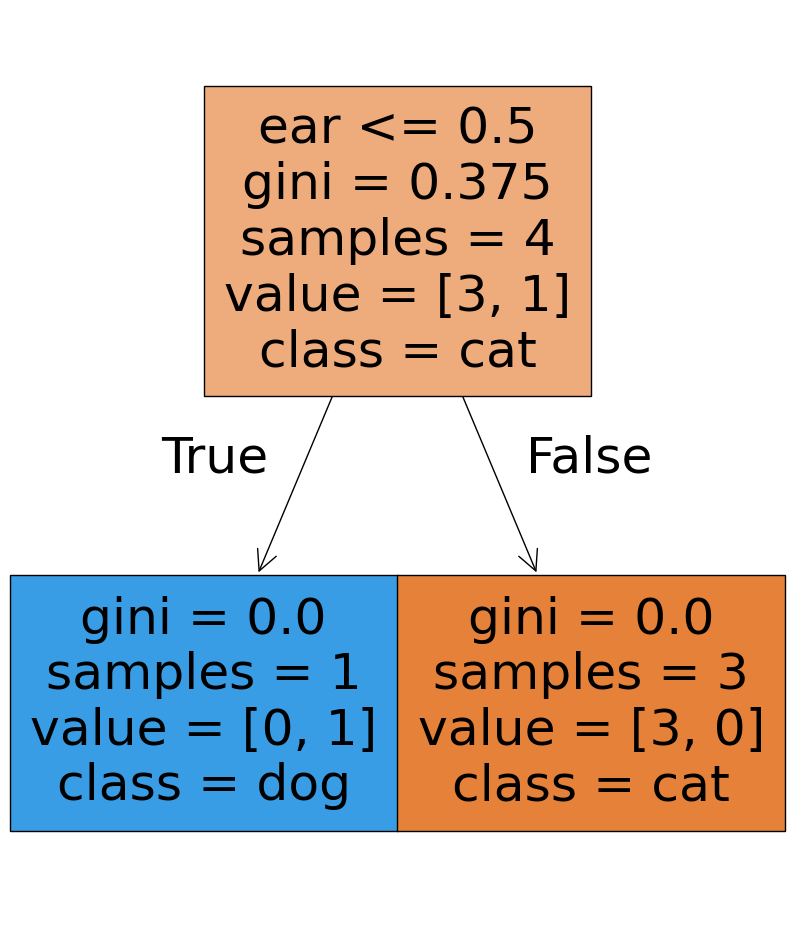

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,12))
plot_tree(
    model,
    feature_names=data.drop('target', axis=1).columns,
    class_names=le.classes_,
    filled=True
)
plt.show()


In [ ]:
# วาดต้นไม้ในลักษณะที่แสดงเป็นข้อความ (export_text) ที่คนทั่วไปสามารถเข้าใจได้ (5 คะแนน)


In [18]:
from sklearn.tree import export_text

rules = export_text(
    model,
    feature_names=list(data.drop('target', axis=1).columns)
)

print(rules)


|--- ear <= 0.50
|   |--- class: dog
|--- ear >  0.50
|   |--- class: cat

